<a href="https://colab.research.google.com/github/k4404c/MAT-422/blob/main/HW4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **4.1 Graphs Introduction**
Important Topics:
* Graph Models
* Laplacian Matrix

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#### **Graph Models**:
* Any graph consists of both a set of objects, called nodes, and the connections
between these nodes, called edges
* Mathematically, a graph $G$ is denoted as
pair $G(V, E)$, where $V$ = {$v_1, v_2, ...v_n$} represents the set of nodes and $E$ =
{$e_1, e_2, ..., e_m$} represents the set of edges and the size of the set is commonly
shown as $m = |E|$.
 * edges can be directed or undirected
 * Graphs that only have
directed edges are called directed graphs and ones that only have undirected
edges are called undirected graphs. Finally, mixed graphs have both directed
and undirected edges.
* A sequence of edges where nodes and edges are distinct, $e_1(v_1, v_2), e_2(v_2, v_3),
e_3(v_3, v_4), ..., e_i(v_i, v_{i+1})$, is called a path.
 * A closed path is called a cycle.
 * The
length of a path or cycle is the number of edges traversed in the path or cycle.
* In a directed graph, we only count directed paths because traversal of edges
is only allowed in the direction of the edges. For a connected graph, multiple
paths can exist between any pair of nodes
* In a network, nodes with the
most connections possess the greatest degree of centrality.
 * Degree centrality
measures relative levels of importance
 * In-
degree centrality describes the popularity of a node and its prominence or
prestige.
 * Out-degree centrality describes the gregariousness of the node.

#### **Laplacian Matrix**:
* A graph with n nodes can be represented by a $n × n$ adjacency matrix.

* The
Laplacian matrix L of G is an n by n symmetric matrix, with one row and
column for each vertex, such that\
$L_{i j}$ =
 * $∑_k E_{ik}$ ,  if $ i = j,$
 * $−E_{i j}$, if $i ≠ j$, and $v_i$ is adjacent to $v_j$,
 * $0$, otherwise.
* In addition, a $n × m$ incidence matrix of $G$, denoted by $I_G$ has one row per
vertex and one column per edge. The column corresponding to edge {i, j} of
IG is zero except the i-th and j-th entries, which are $\sqrt{E_{ij}}$ and $−\sqrt{E_{ij}}$. respectively.
* Theorem 4.1.3 The Laplacian matrix L of has the following properties:
 1. $L = D − M$, where $M$ is the adjacency matrix and $D$ is the diagonal degree
matrix with $D_{ii}$ = $∑_k E_{ik}$.
 2. $L = I_G^IT_G$.
 3. $L$ is symmetric positive semi-definite. All eigenvalues of $L$ are real and
non-negative, and $L$ has a full set of $n$ real and orthogonal eigenvectors.
 4. Let $e = [1, ..., 1]^T$ . Then $Le = 0$. Thus 0 is the smallest eigenvalue and e is
the corresponding eigenvector.
 5. If the graph $G$ has $c$ connected components, then $L$ has c eigenvalues that
is 0.
 6. For any vector $x$, $x^T Lx$ = $∑_{(i, j)∈E} E_{i j}(x_i − x_j)^2.$
 7. For any vector $x$ and scalars
$α,
β , (
αx +
β e)^T L(
αx +
β e) =
α^2x^T Lx.$
 8. The problem
$min_{x ≠ 0}xT Lx,$ subject to , $x^T x$ = $1, x^T e = 0$,
is solved when $x$ is the eigenvector corresponding to the second smallest
eigenvalue (the Fiedler vector )
$λ_2$ of the eigenvalue problem\
$Lx = λx$.


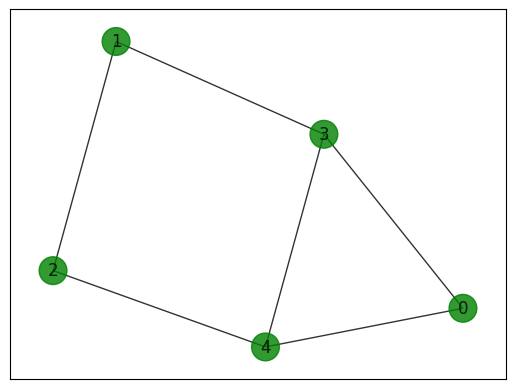

Adjacency matrix representing graph: 
[[0. 0. 0. 1. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0.]]


Eigenvector corresponding to largest eigenvalue of w: 
[-0.42713229 -0.35775124 -0.35775124 -0.5298991  -0.5298991 ]

Observe that v3 and v4 have largest magnitude. This corresponds to them being the most connected nodes.

[-1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j]


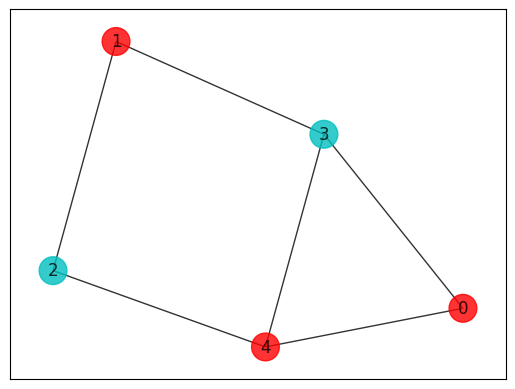


Maxcut approximated solution = [0, 0, 1, 1, 0]


In [13]:
import cvxpy as cp
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=400, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
    plt.show()

#CLASSICAL
n = 5
G = nx.Graph()
G.add_nodes_from(np.arange(0,4,1))


edges = [(1,2),(1,3),(2,4),(3,4),(3,0),(4,0)]
#edges = [(0,1),(1,2),(2,3),(3,4)]#[(1,2),(2,3),(3,4),(4,5)]
G.add_edges_from(edges)

colors = ["g" for node in G.nodes()]
pos = nx.spring_layout(G)
draw_graph(G, colors, pos)
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = 1

print(f"Adjacency matrix representing graph: \n{w}\n")
w2 = [[0 , 1, 0], [1, 0, 1], [0, 1, 0]]

vals, vects = np.linalg.eig(w)
maxcol = list(vals).index(max(vals))
eigenvect = vects[:,maxcol]
print(f"\nEigenvector corresponding to largest eigenvalue of w: \n{eigenvect}")
print(f"\nObserve that v3 and v4 have largest magnitude. This corresponds to them being the most connected nodes.\n")
#print(eigvals)

#Goemans-Williamson 0.87
X = cp.Variable((n,n), symmetric = True) #construct nxn matrix
constraints = [X >> 0] + [ X[i,i] == 1 for i in range(n) ]
# diagonals must be 1 (unit) and eigenvalues must be postivie
#semidefinite


objective = sum( (0.5)* (1 - X[i,j]) for (i,j) in edges)
#this is function defing the cost of the cut. You want to maximize this function
#to get heaviest cut

prob = cp.Problem(cp.Maximize(objective), constraints)
prob.solve()
#solves semidefinite program, optimizes linear cost function

sqrtProb = scipy.linalg.sqrtm(X.value)
#normalizes matrix, makes it applicable in unit sphere

hyperplane = np.random.randn(n)
#generates random hyperplane used to split set of points into two disjoint sets of nodes

sqrtProb = np.sign( sqrtProb @ hyperplane)
#gives value -1 if on one side of plane and 1 if on other
#returned as a array

print(sqrtProb)


colors = ["r" if sqrtProb[i] == -1 else "c" for i in range(n)]
sets = [0 if sqrtProb[i] == -1 else 1 for i in range(n)]




draw_graph(G, colors, pos)
print("\nMaxcut approximated solution = " + str(sets))